In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
def load_image(filename):
    img = mpimg.imread(filename)
    if len(img[0][0])==4: # if png file
        img = np.delete(img, 3, 2)
    if type(img[0][0][0])==np.float32:  # if stored as float in [0,..,1] instead of integers in [0,..,255]
        img = img*255
        img = img.astype(np.uint8)
    mask = np.ones((len(img),len(img[0]))) # create a mask full of "1" of the same size of the laoded image
    img = img.astype(np.int32)
    return img, mask

### `mask` in this case does not directly "hide" the color channels of the image. Instead, it's a separate array that corresponds to the height and width of the image but does not interact with the color channels in any way.

- img.shape returns (height,width,channels)
- mask.shape returns (height,width)
- (280,500,3) means there are 3 channels with height and width of 280 and 500 respectively
- img[1,1] will give (R,G,B)

In [3]:
img,mask=load_image('test.png')

In [4]:
img.shape

(280, 500, 3)

In [5]:
mask.shape

(280, 500)

### The function `save_image(filename, image)` is designed to save an image to a file, if file not created `imsave` auto creates for you

In [6]:
def save_image(filename, image):
    img = image.astype(np.uint8)
    mpimg.imsave(filename, img)

### Changing the brightness
In order to change the brightness of an image, you can simply add to each of the three RGB components an
integer value between -255 and +255 included (+255 will increase a lot the brightness, while -255 will reduce
it a lot). Remember that in RGB encoding, a component value can’t be smaller than 0 or greater than 255.
The input value will be queried to the user in the menu function (with error check). The function will return
the new image.

In [23]:
img_test=img
print(img_test.shape)

(280, 500, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-255..-16].


(280, 500, 3) shape after changing brightness


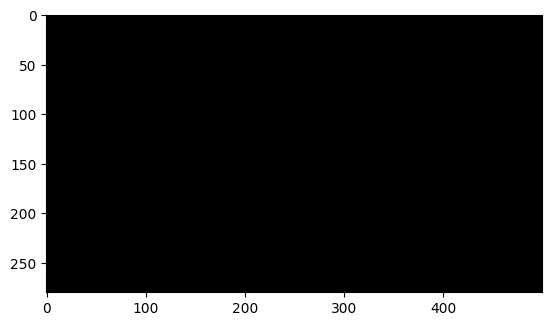

In [24]:
x=img_test+ -255
print(f'{x.shape} shape after changing brightness')
plt.imshow(x)

In [25]:
def change_brightness(image, value):
    new_img=image.copy()
    #extra precaution but the menu1 should check for proper user input
    #Also if dont clip, i will get the msg below 
    # Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-255..-16].
    new_img=np.clip(new_img+value,0,255)
    
    return new_img


Text(0.5, 1.0, 'Brightening by 100')

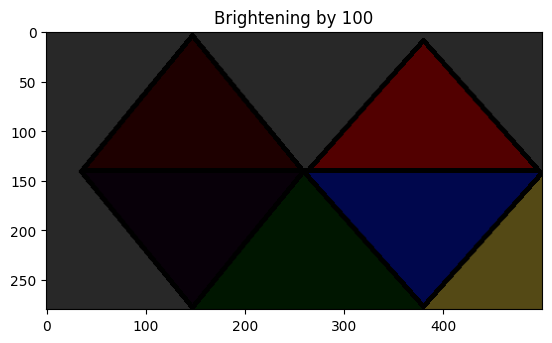

In [26]:
x=change_brightness(x,100)
plt.imshow(x)
plt.title('Brightening by 100')

### Changing the contrast.
- contrast correction factor F = 259∗(value+255) /
255∗(259−value) 
- R′ = F × (R − 128) + 128
- G′ = F × (G − 128) + 128
- B′ = F × (B − 128) + 128

In [55]:
def change_contrast(image, value):
    new_img=image.copy()
    contrast_f= (259*(value+255))/(255*(259-value))
    new_img=contrast_f*(new_img-128)+128
    #clipping for extraprecaution
    new_img=np.clip(new_img,0,255)
    return new_img

In [104]:
img,mask=load_image('test.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Text(0.5, 1.0, 'change in contrast')

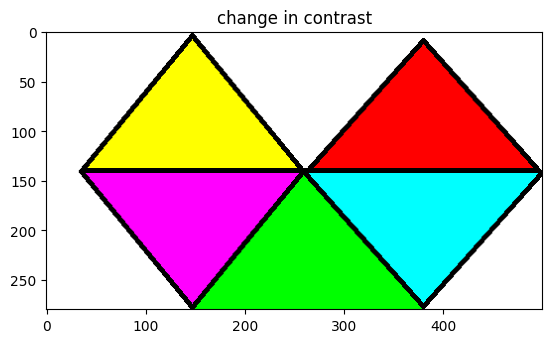

In [57]:
x=change_contrast(img,150)
plt.imshow(x)
plt.title('change in contrast')

### Gray Scale: Instead,
a better formula would then be to assign (0.3 · R + 0.59 · G + 0.11 · B) to each of the three RGB components for
each pixel of the image. The function will return the new image.


In [60]:
img.shape

(280, 500, 3)

In [65]:
img[2,2]

array([195, 195, 195], dtype=int32)

In [77]:
def grayscale(image):

    new_img=image.copy()
    #need to iter the entire array to get RGB, then apply the formula
    for i in range(new_img.shape[0]): #rows
        for j in range(new_img.shape[1]): #cols
            r,g,b=new_img[i,j]
            gray_value=int(0.3*r+0.59*g+0.11*b)
            new_r,new_g,new_b=gray_value,gray_value,gray_value
            #replacing original values to gray values
            new_img[i,j]=[new_r,new_g,new_b]

    return new_img

In [78]:
x=grayscale(img)

Text(0.5, 1.0, 'Grayed')

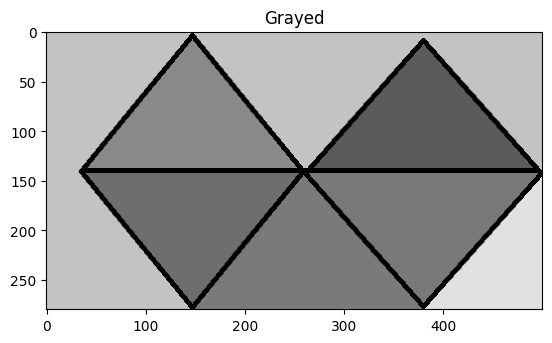

In [80]:
plt.imshow(x)
plt.title('Grayed')

### Blur_effect

### applying formula and applying to all the pixels so need iter color channel
- for the m region
https://www.notion.so/Blue-effect-M-explanation-12355855d6e98088a0b5dd0c38e3ecb2

In [156]:
img[:,:,2].shape

(280, 500)

In [93]:
img.shape[2]

3

In [158]:
def blur_effect(image):

    new_img=image.copy()
    k=np.array([[0.0625, 0.125, 0.0625],[0.125, 0.25, 0.125],[0.0625, 0.125, 0.0625]])
    #iter the entire array and we excluding the borders CUZ we do not wan to blur the frame so -1 !
    for i in range(1, new_img.shape[0]-1):
        for j in range(1,new_img.shape[1]-1):
            #the 3x3 matrix around the current pixel to get M in the pdf doc
            M = image[i-1:i+2,j-1:j+2]  # 3x3 region
            
            for c in range(new_img.shape[2]):
                new_img[i, j, c] = np.sum(M[:,:,c]*k)
    return new_img

In [159]:
x=blur_effect(img)
x=blur_effect(x)
x=blur_effect(x)
x=blur_effect(x)
x=blur_effect(x)
x=blur_effect(x)

Text(0.5, 1.0, 'Blured Picture')

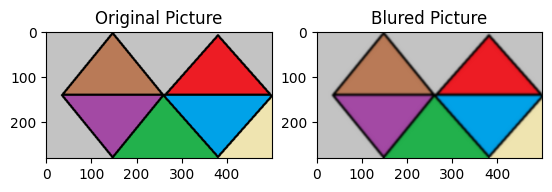

In [160]:
fig,ax=plt.subplots(1,2,figure=(24,2))

ax[0].imshow(img)
ax[0].set_title('Original Picture')
ax[1].imshow(x)
ax[1].set_title('Blured Picture')
